In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
df = pd.read_pickle('data/test_jets.pkl')
df

[[array([[ 1.55277740e+02,  4.98186836e+01, -1.19656364e+02,
          -8.55080643e+01],
         [ 1.38981049e+02,  6.84998932e+01, -9.33625412e+01,
          -7.68565674e+01],
         [ 6.30987816e+01,  2.17617111e+01, -4.83931313e+01,
          -3.41465759e+01],
         [ 5.27620621e+01,  1.93094883e+01, -3.89592819e+01,
          -2.98856716e+01],
         [ 4.32813606e+01,  1.56214714e+01, -3.21897812e+01,
          -2.43528996e+01],
         [ 3.75564079e+01,  1.26426392e+01, -2.86630211e+01,
          -2.07142143e+01],
         [ 3.10337467e+01,  1.11590614e+01, -2.38022099e+01,
          -1.64931355e+01],
         [ 1.96771412e+01,  7.29109144e+00, -1.50436974e+01,
          -1.03786802e+01],
         [ 1.72940960e+01,  7.53557110e+00, -1.11489372e+01,
          -1.08628769e+01],
         [ 1.31624231e+01,  4.72794199e+00, -9.89461136e+00,
          -7.27960348e+00],
         [ 1.17998123e+01,  4.73004246e+00, -8.95830631e+00,
          -6.05070400e+00],
         [ 1.08061876

In [9]:
df[0][0].shape

(40, 4)

In [22]:
for i in range(200):
    pDict[i] = [m+'_'+str(i) for m in momenta]
parArr = np.ndarray(shape=(200*40,5))
df = df.reset_index(drop=True)

# particle = 200
n_par = 200

In [23]:
for jet in range(40):
    for par in range(n_par):
        parArr = np.append(parArr, np.append(df.loc[jet,pDict[par]].values,jet))
parArr.shape

(100, 8)


In [8]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
f = h5py.File('data/processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_1.z', 'r')
treeArray = f['t_allpar_new'][()]
features = ['j1_etarot', 'j1_phirot', 'j1_ptrel','j_index']
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t', 'j_index']

In [5]:
features_labels_df = pd.DataFrame(treeArray,columns = list(set(features + labels)))
features_labels_df = features_labels_df.drop_duplicates()

features_labels_df = features_labels_df.head(n = 750000)
features_df = features_labels_df[features]
labels_df = features_labels_df[labels]

In [6]:
labels_vals = labels_df[labels_df['j_index'].duplicated() == False].drop('j_index',axis=1)
labels_vals

j_g  j_q  j_w  j_z  j_t
0         0    0    1    0    0
62        1    0    0    0    0
117       0    0    1    0    0
147       0    0    0    1    0
178       1    0    0    0    0
...     ...  ...  ...  ...  ...
749844    0    0    1    0    0
749878    0    0    1    0    0
749917    0    0    1    0    0
749944    0    0    0    1    0
749998    1    0    0    0    0

[14489 rows x 5 columns]

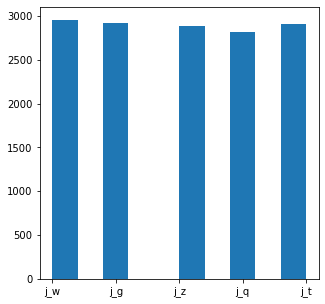

In [9]:
dat = []
for row in labels_vals.iterrows():
    for j in range(row[1].shape[0]):
        if row[1][j]==1:
            dat.append(labels[j])
plt.figure(figsize=(5,5))
plt.hist(dat)
plt.show()
plt.close()